In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from imageio import imread
import sys

In [2]:
%matplotlib notebook

In [7]:
def binary_to_eig(image):
    rot_image = np.rot90(image,k=-1)
    idx = np.argwhere(rot_image)
    return idx[:,0] + 1j*idx[:,1]

def grayscale_to_eig(image):
    rot_image = np.rot90(image,k=-1)
    rows,cols = np.unravel_index(np.argsort(rot_image,axis=None),shape=rot_image.shape)
    colors = np.sort(A.flatten())
    return rows + 1j*cols, colors

def grayscale_to_coords(image):
    rot_image = np.rot90(image,k=-1)
    rows,cols = np.unravel_index(np.argsort(rot_image,axis=None),shape=rot_image.shape)
    colors = np.sort(image.flatten())
    return rows+.5,cols+.5,colors

def animate_pixels(img1,img2,filename):
    rows1,cols1,colors1 = grayscale_to_coords(img1)
    rows2,cols2,colors2 = grayscale_to_coords(img2)
    aspect_ratio = img1.shape[0]/img1.shape[1]
    plt.ioff()
    fig = plt.figure(figsize=(6.4,aspect_ratio*6.4))
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")
    plt.axis("off")
    plt.xlim((0,img1.shape[1]))
    plt.ylim((0,img1.shape[0]))
    pixels = img1.shape[1]
    pixels_per_inch = pixels/6.4
    size = 72/pixels_per_inch
    points = ax.scatter(rows1,cols1,c=colors1,cmap="gray",marker='s',s=size**2,vmin=0,vmax=1)
    
    n=300
    buffer = 30
    colors = np.linspace(colors1,colors2,n)
    rows = np.linspace(rows1,rows2,n)
    cols = np.linspace(cols1,cols2,n)
    pos = np.dstack((rows,cols))
    
    def update(j):
        if j >= buffer and j < buffer+n:
            i = j-buffer
            points.set_offsets(pos[i])
            points.set_array(colors[i])
        elif j >= 3*buffer+n and j < 3*buffer+2*n:
            i = n-(j-(3*buffer+n))-1
            points.set_offsets(pos[i])
            points.set_array(colors[i])
#         if j >= buffer and j < 3*buffer+2*n:
#             i = j-buffer
#             points.set_offsets(np.array([(1-t[i])*rows1+t[i]*rows2,(1-t[i])*cols1+t[i]*cols2]).T)
#             points.set_array(colors[i])

    
    ani = animation.FuncAnimation(fig,update,frames=2*n+4*buffer,interval=30)
    ani.save(filename)
    plt.close(fig)
    plt.ion()

In [2]:
img1 = np.array(imread("camera2.png",as_gray=True))/256
img2 = np.array(imread("lena.png",as_gray=True))/256

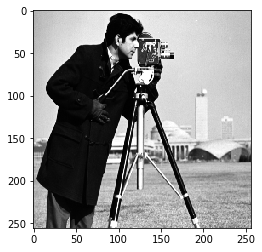

In [3]:
plt.imshow(img1,cmap="gray")
plt.show()

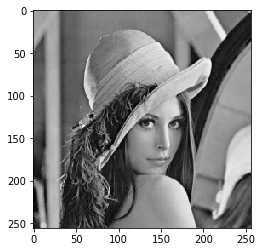

In [4]:
plt.imshow(img2,cmap="gray")
plt.show()

In [8]:
animate_pixels(img1,img2,"mixing2.mp4")

<IPython.core.display.Javascript object>


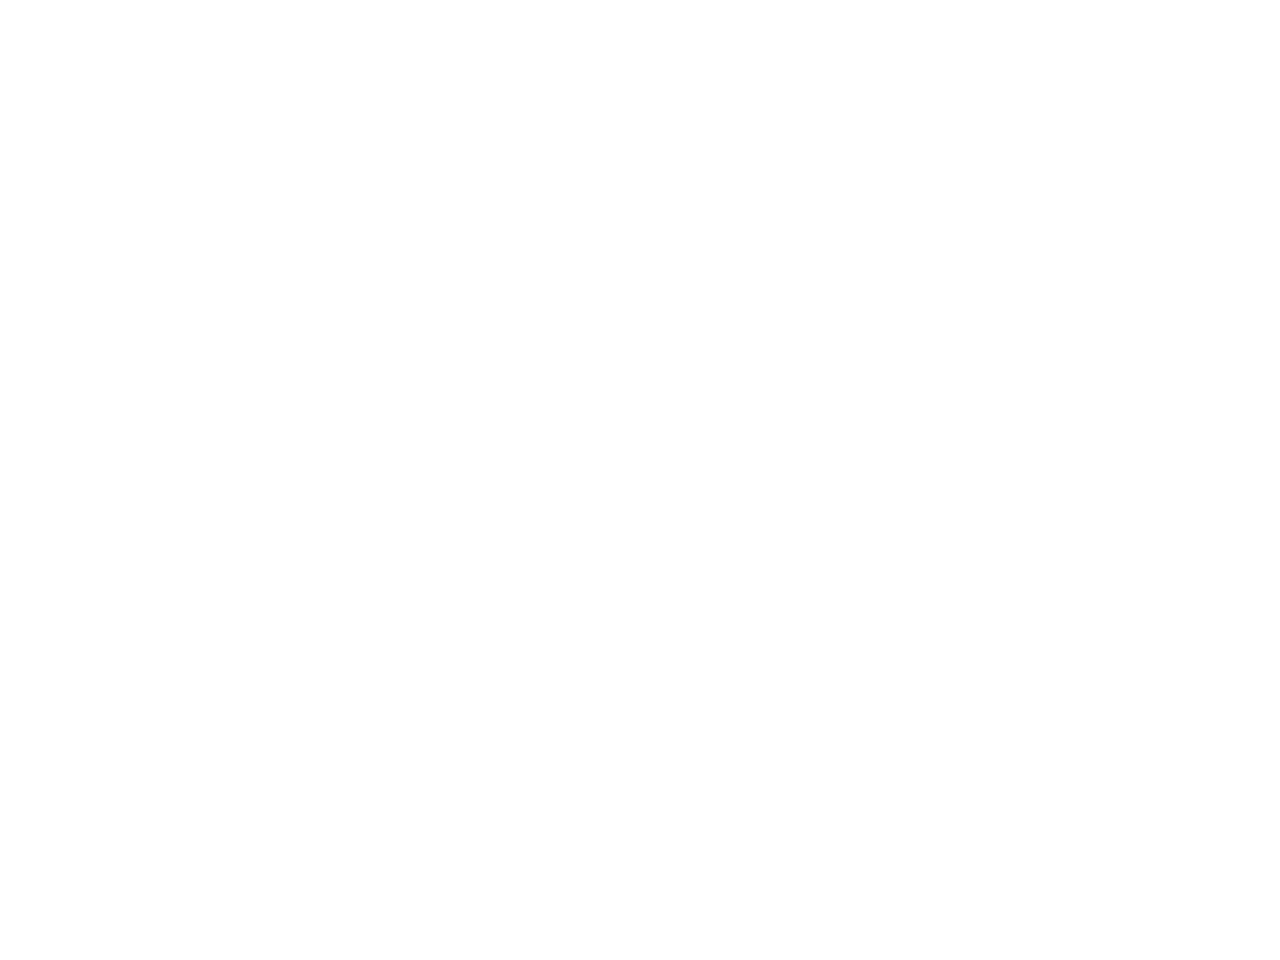

In [5]:
x = [1,2,3,4]
y = [1,2,3,4]
scatter = plt.scatter(x,y)
plt.show()

<IPython.core.display.Javascript object>


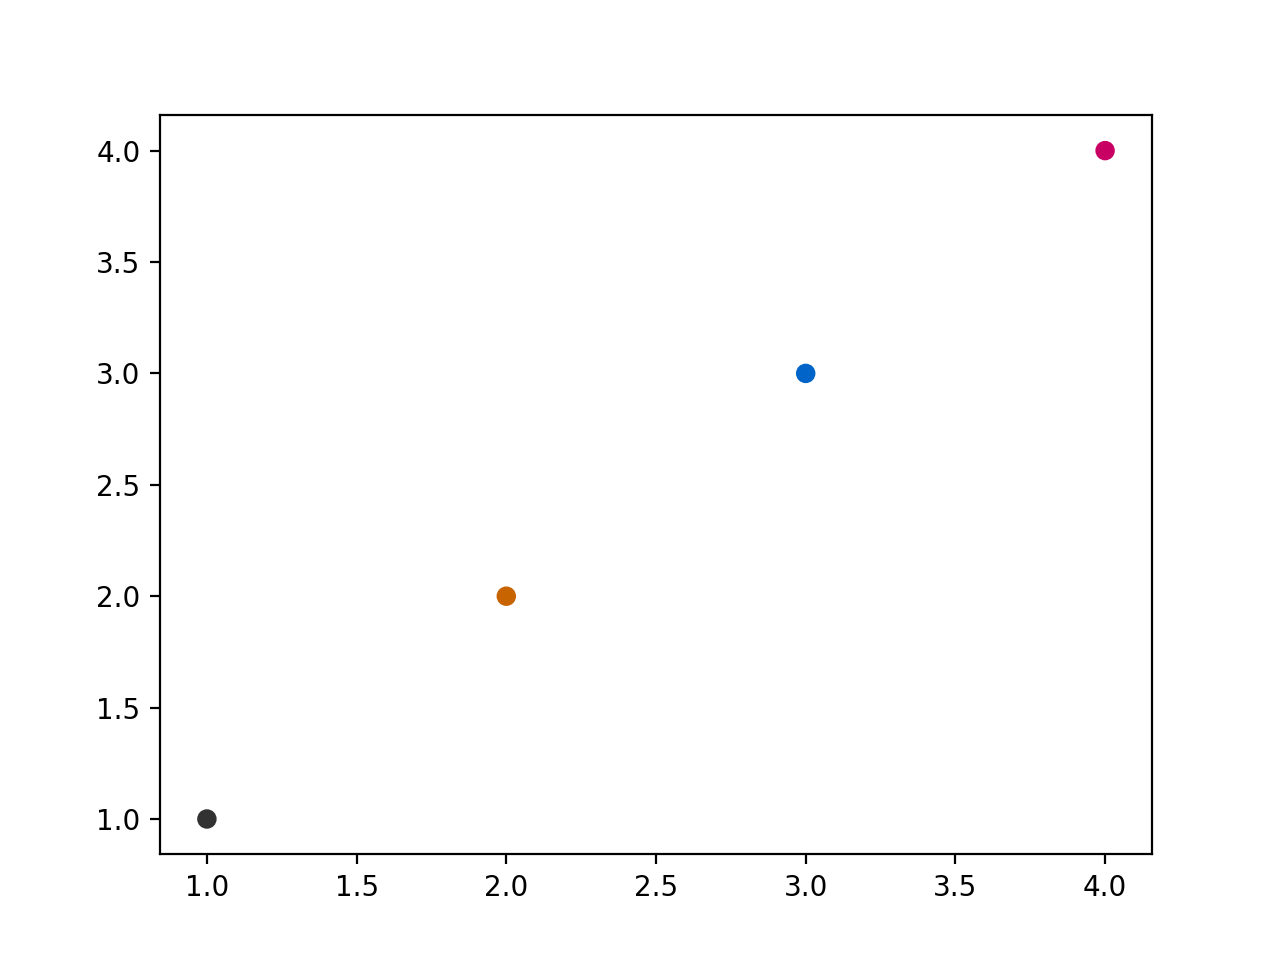

In [15]:
plt.scatter(x,y,c=(colors/255))
plt.show()

In [12]:
colors = np.array([(50,50,50),(200,100,0),(0,100,200),(200,0,100)])

In [16]:
X = np.array([[50,20],[100,100],[0,100]])

In [17]:
X

array([[ 50,  20],
       [100, 100],
       [  0, 100]])

In [22]:
print(X[:,0].argsort())
print(X[:,1].argsort())

[2 0 1]
[0 1 2]


In [24]:
from PIL import Image

In [25]:
im = Image.open("camera2.png")

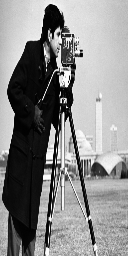

In [35]:
im.resize((128,256))

In [31]:
im?

In [36]:
im.size

(256, 256)

$A = w \times \alpha w$

$A= \alpha w^2$

$x^2 = \frac{A}{\alpha w^2}$

In [38]:
string = "file.mp4"

In [42]:
string[-4:]

'.mp4'